In [1158]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as astro 
import pandas as pd
#import camb as cb
%matplotlib inline

In [1159]:
from pylab import imshow
from numpy import random
from PIL import Image
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from numpy.linalg import inv
from __future__ import division

In [1160]:
#hitsmap part 
#Hitmap=np.random.rand(500,500) #generate random array and graph 
#np.clip(Hitmap,0,1) 
Hitmap=[[0.50,0.82,0.36],[0.40,0.38,0.67],[0.66,0.80,0.33]]
print(Hitmap)

[[0.5, 0.82, 0.36], [0.4, 0.38, 0.67], [0.66, 0.8, 0.33]]


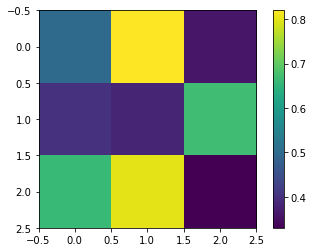

In [1161]:
plt.colorbar(imshow(Hitmap))
imshow(Hitmap)

In [1162]:
M=np.mean(Hitmap)
print(M) 
length=len(Hitmap)
print(length)

0.5466666666666666
3


In [1163]:
#Fourrier Space Amplitude

In [1164]:
#A_noise

In [1165]:
Spectrum=np.fft.fft(Hitmap) #fft of Hitmap
#Spectrum=np.fft.ifft(Hitmap) #ifft of Hitmap
#Spectrum2=np.fft.fft2(Hitmap) #fft2 of Hitmap
#Spectrumn=np.fft.fftn(Hitmap) #fftn of Hitmap
Abs=np.abs(Spectrum)
#print(Spectrum)
#print(Abs)

Inverse=inv(np.matrix(Hitmap))
#Transpose=np.transpose(Hitmap)

A_n= Inverse * Abs 
A_noise=np.abs(A_n*A_n)#squaring the amplitude
print(A_noise) 

[[1.26069216 0.1949826  0.1949826 ]
 [1.71617532 0.30791598 0.30791598]
 [1.27559241 0.198677   0.198677  ]]


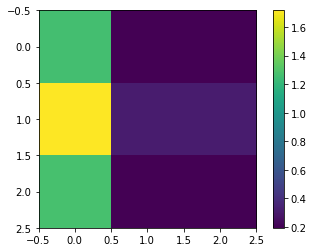

In [1166]:
plt.colorbar(imshow(A_noise))
imshow(A_noise)
#the ends have always been uniform
#there may be something wrong with the fourier transform

In [1167]:
def Noisemap(Hitmap,A_noise): 
    norm=np.random.normal(M,length)
    np.clip(norm,0,1) 
    Inital = np.abs(A_noise * norm)
    Final = np.abs(np.fft.ifft((Inital/Hitmap)))#inverse fourier transform to turn into real space
    print('Inital',Inital)
    print('Final',Final)   
    plt.colorbar(imshow(Final))
    imshow(Final)

Inital [[4.22356545 0.65322987 0.65322987]
 [5.74952316 1.03157878 1.03157878]
 [4.27348421 0.66560682 0.66560682]]
Final [[3.68609337 2.39858582 2.39858582]
 [6.20938623 4.09627874 4.09627874]
 [3.10799166 1.7178944  1.7178944 ]]


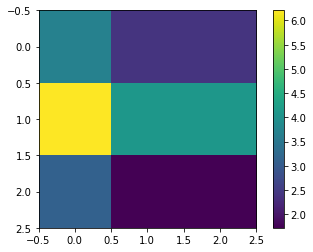

In [1168]:
Noisemap(Hitmap,A_noise)